# Customer Clustering with PCA, KMeans and Agglomerative for a Marketing Campaign

## Introduction



This notebook provides an overview of the steps taken to process and explore the data in the marketing campaign data. The code uses Pandas and Plotly Express for data preprocessing, visualization, and exploration. The code also uses scikit-learn for dimensionality reduction using PCA and for clustering using KMeans and Agglomerative Clustering.


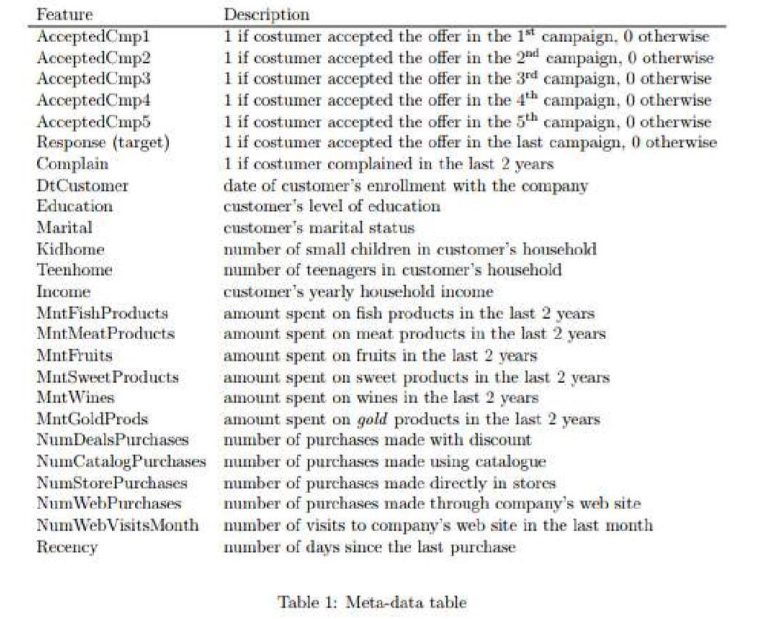

'/content/dictionary.png'

In [3]:
from google.colab.patches import cv2_imshow

import cv2
img = cv2.imread('dictionary.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

display("/content/dictionary.png")

In [4]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('/content/ifood_df.csv')


In [11]:
# Get the shape of the dataframe
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (2205, 39)


In [12]:
# Get the head of the dataframe
print("\nFirst 5 rows of the dataframe:")
df.head()


First 5 rows of the dataframe:


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 39 columns]

In [13]:
# Get the tail of the dataframe
print("\nLast 5 rows of the dataframe:")
df.tail()


Last 5 rows of the dataframe:


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
2200              182               42               118           247  ...   
2201               30                0                 0             8  ...   
2202              217               32                12            24  ...   
2203              214               80                30            61  ...   
2204               61                2                 1            21  ...   

      marital_Together  marital_Widow  education_2n Cycle  education_Basic  \
2200                 0              0                   0                0   
2201                 1              0                   0                0   
2202                 0              0                   0                0   
2203                 1              0                   0                0   
2204                 0              0                   0                0   

      education_Graduation  education_Master  education_PhD  MntTotal  \
2200                     1                 0              0      1094   
2201                     0                 0              1       436   
2202                     1                 0              0      1217   
2203                     0                 1              0       782   
2204                     0                 0              1       151   

      MntRegularProds  AcceptedCmpOverall  
2200              847                   0  
2201              428                   1  
2202             1193                   1  
2203              721                   0  
2204              130                   0  

[5 rows x 39 columns]

In [14]:
# Get the information about the dataframe
print("\nInformation about the dataframe:")
print(df.info())


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   

In [15]:
# Get the summary statistics of the dataframe
print("\nSummary statistics of the dataframe:")
df.describe()


Summary statistics of the dataframe:


Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  marital_Together  marital_Widow  education_2n Cycle  \
count   2205.000000  ...       2205.000000    2205.000000         2205.000000   
mean      44.057143  ...          0.257596       0.034467            0.089796   
std       51.736211  ...          0.437410       0.182467            0.285954   
min        0.000000  ...          0.000000       0.000000            0.000000   
25%        9.000000  ...          0.000000       0.000000            0.000000   
50%       25.000000  ...          0.000000       0.000000            0.000000   
75%       56.000000  ...          1.000000       0.000000            0.000000   
max      321.000000  ...          1.000000       1.000000            1.000000   

       education_Basic  education_Graduation  education_Master  education_PhD  \
count      2205.000000           2205.000000       2205.000000    2205.000000   
mean          0.024490              0.504762          0.165079       0.215873   
std           0.154599              0.500091          0.371336       0.411520   
min           0.000000              0.000000          0.000000       0.000000   
25%           0.000000              0.000000          0.000000       0.000000   
50%           0.000000              1.000000          0.000000       0.000000   
75%           0.000000              1.000000          0.000000       0.000000   
max           1.000000              1.000000          1.000000       1.000000   

          MntTotal  MntRegularProds  AcceptedCmpOverall  
count  2205.000000      2205.000000          2205.00000  
mean    562.764626       518.707483             0.29932  
std     575.936911       553.847248             0.68044  
min       4.000000      -283.000000             0.00000  
25%      56.000000        42.000000             0.00000  
50%     343.000000       288.000000             0.00000  
75%     964.000000       884.000000             0.00000  
max    2491.000000      2458.000000             4.00000  

[8 rows x 39 columns]

In [16]:
# Get the data type of each column in the dataframe
print("\nData type of each column in the dataframe:")
print(df.dtypes)


Data type of each column in the dataframe:
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          in

# Data Preparation 

### Missing Data 

In [17]:
# Check for missing data
print("Missing data in the dataframe:")
print(df.isnull().sum())


Missing data in the dataframe:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegu

<Axes: >

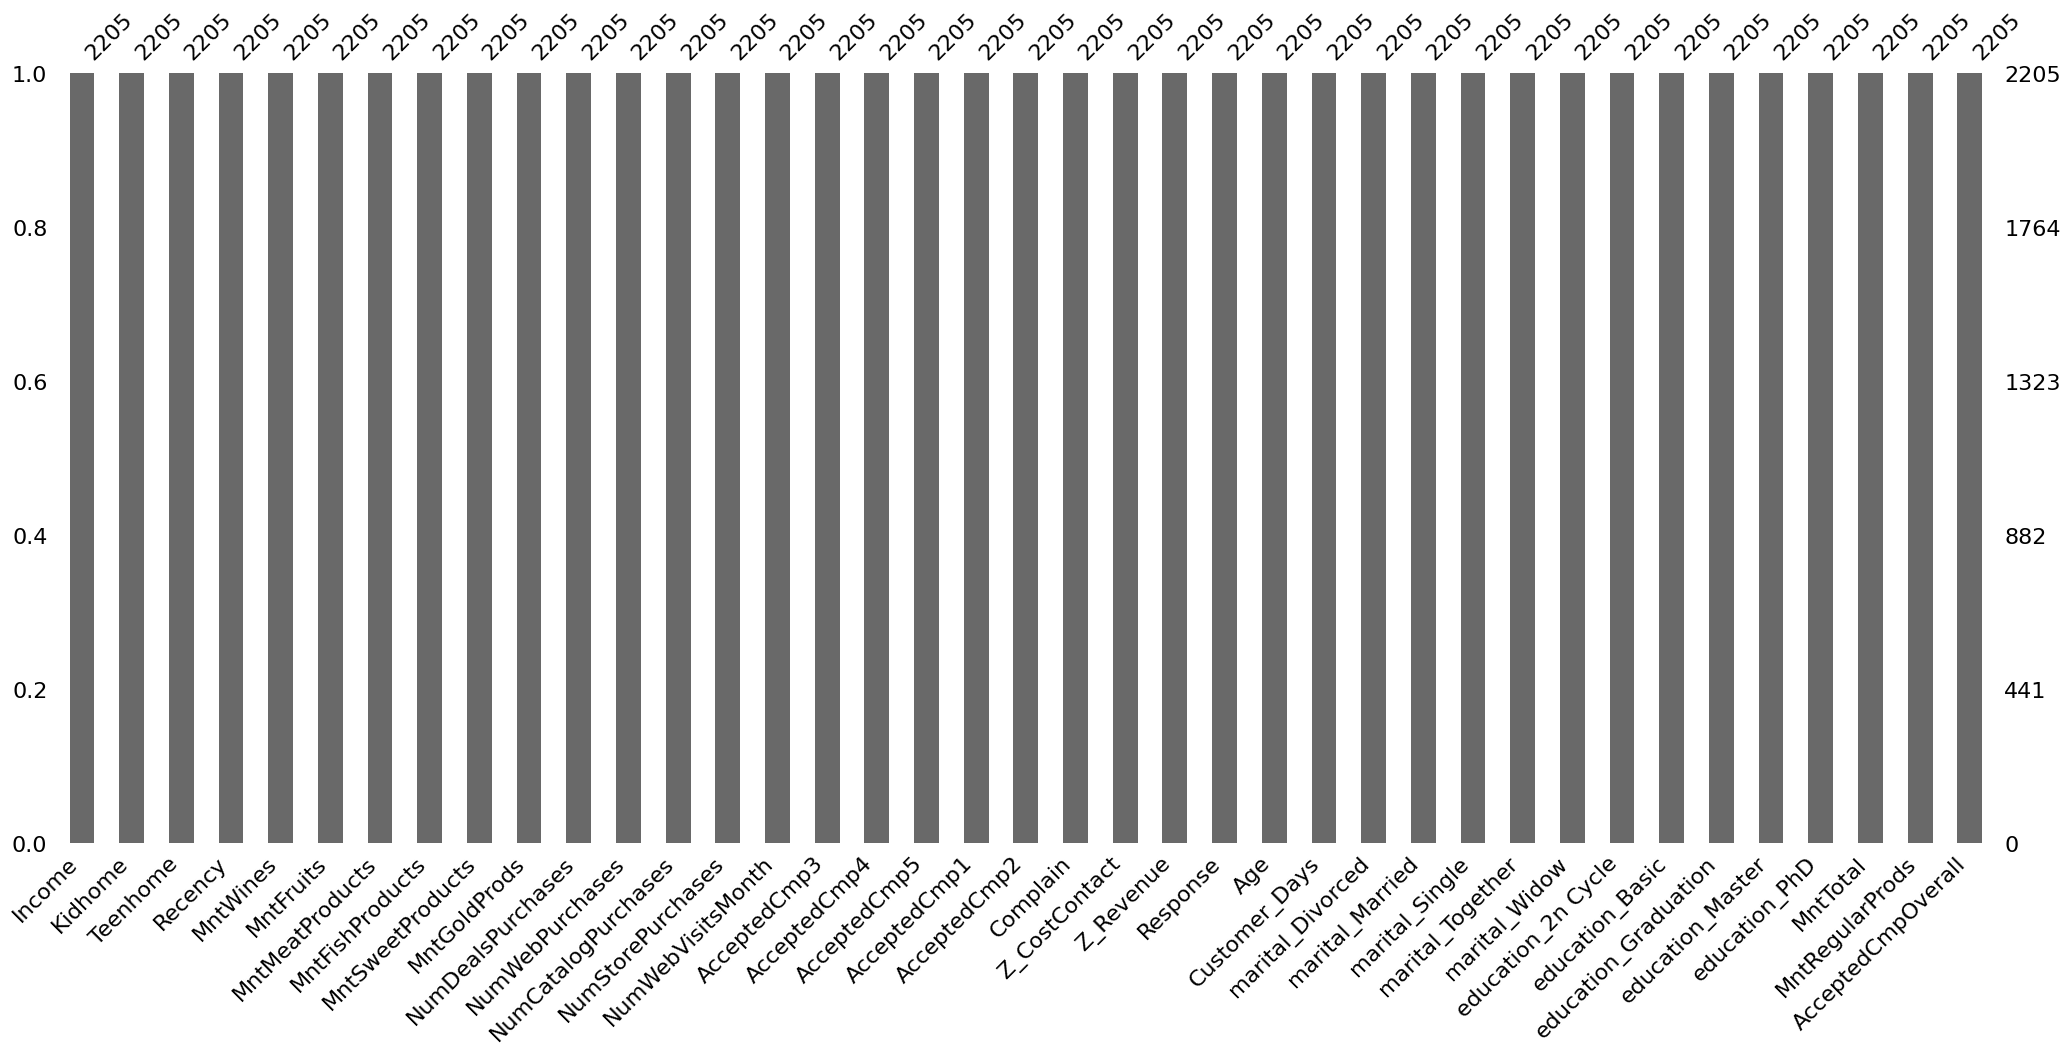

In [18]:
import missingno as msno
# Visualize missing data

msno.bar(df)

<Axes: >

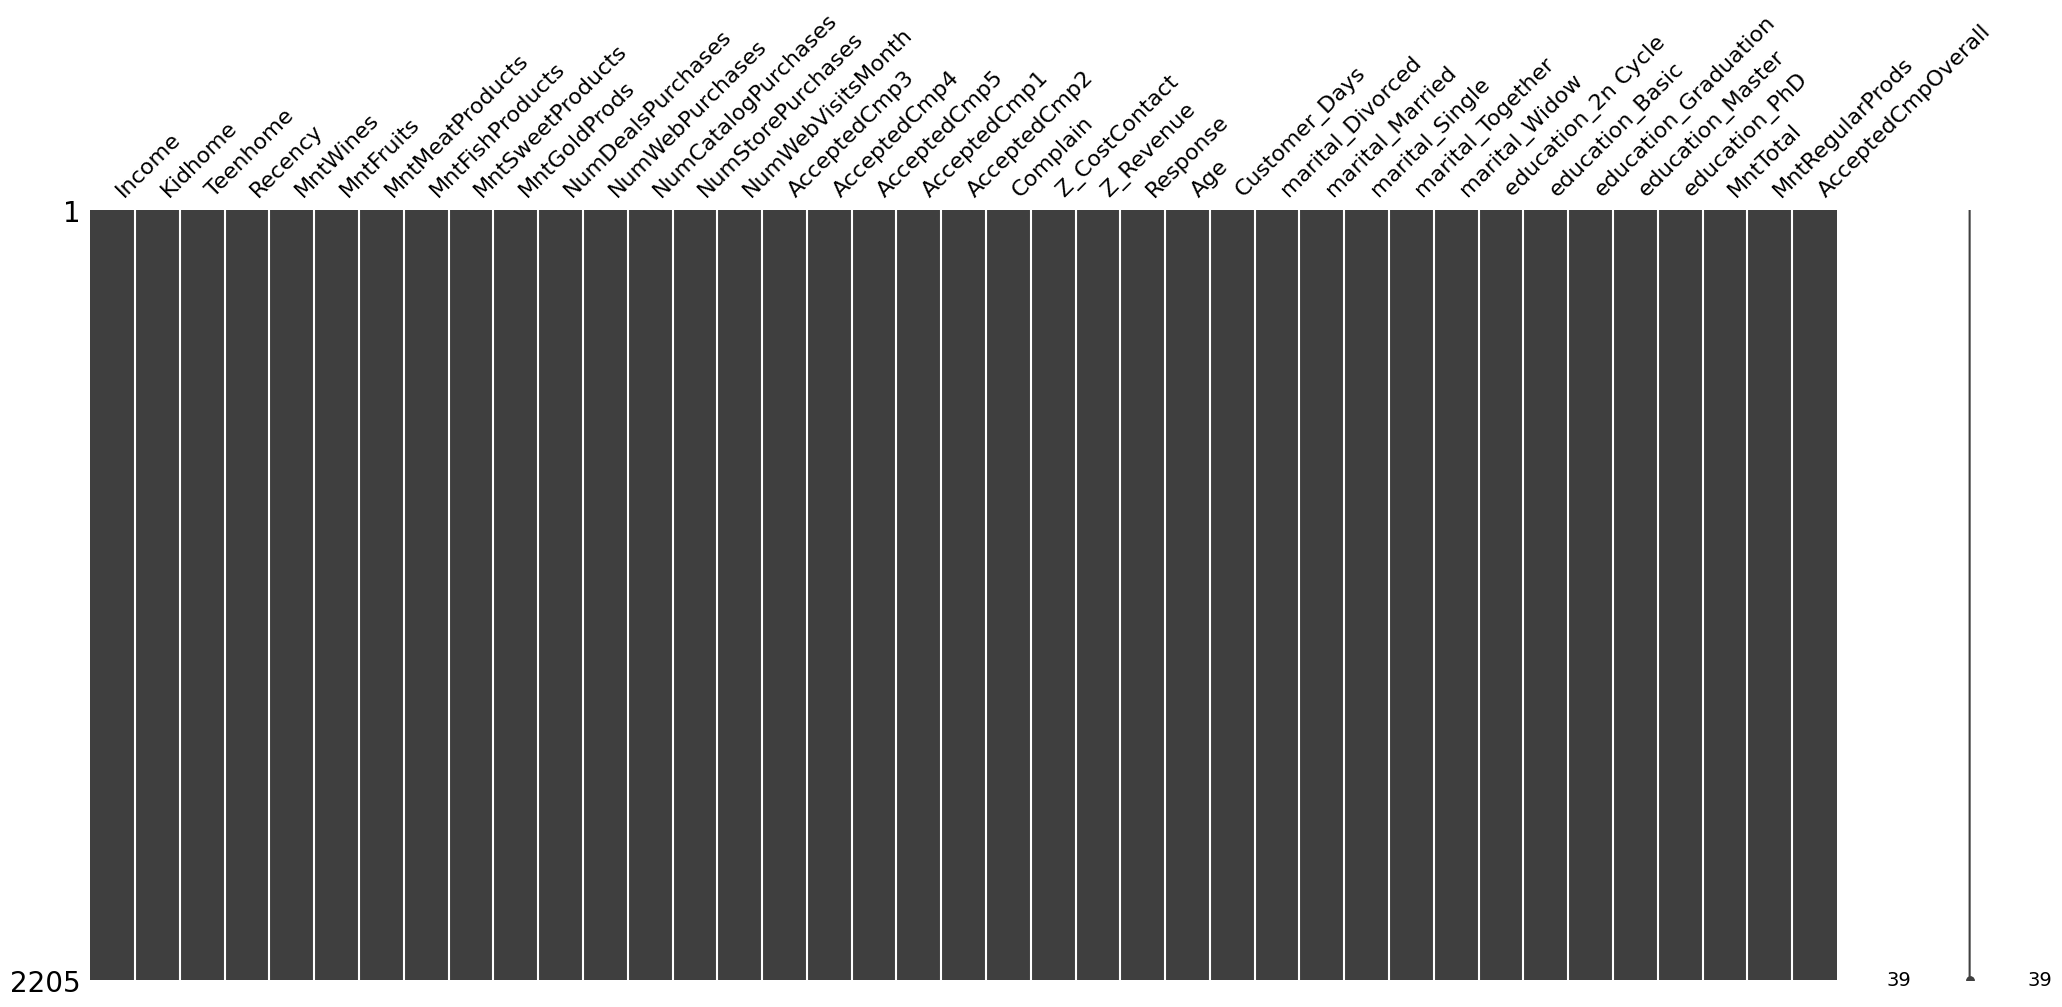

In [19]:
# Visualize missing data
msno.matrix(df)


"Given that missing data exists only in one column and constitutes only a small proportion (24 out of 2240) of the total data, we have decided to drop these missing values without significantly affecting the overall integrity of the data."

In [20]:
df = df.dropna()

In [21]:
df.duplicated().sum()


184

### Outliers 

In [22]:
import matplotlib.pyplot as plt

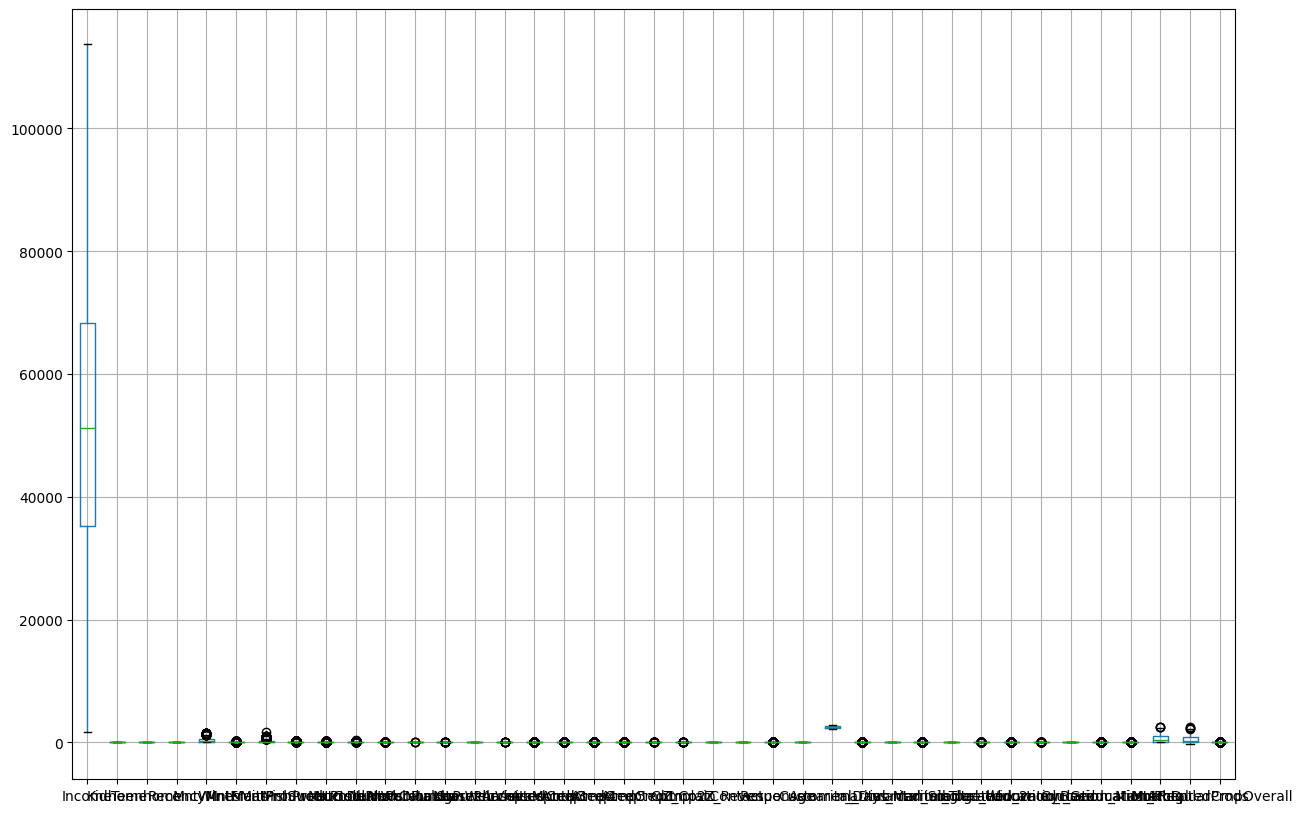

In [23]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the box plots for all columns
df.boxplot(ax=ax)

# Show the plot
plt.show()






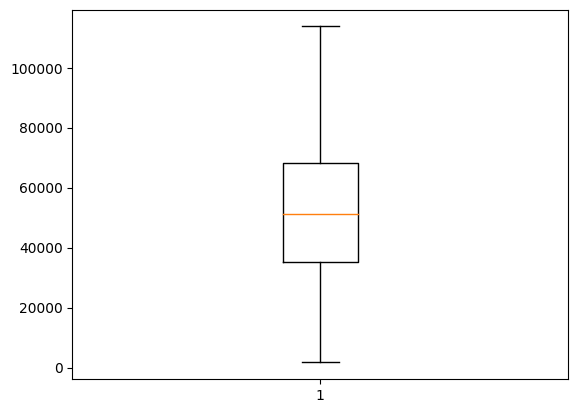

In [24]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

In [25]:

# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 0


In [26]:
# Remove the outliers in the Income column
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [27]:
# Print the updated shape of the dataframe
print("Updated shape of the dataframe:", df.shape)

Updated shape of the dataframe: (2205, 39)


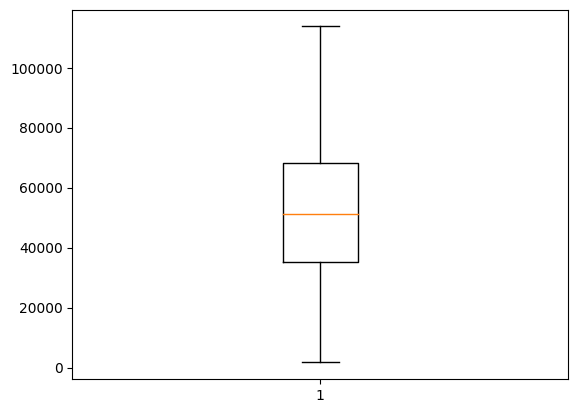

In [28]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

# Feature engineering

### Creating new features/columns

In [31]:
print("Unique values in Education column:", df['education_Basic'].unique())
print("Unique values in Marital_Status column:", df['Marital_Status'].unique())


Unique values in Education column: [0 1]


KeyError: ignored

#### Creating Total number of campaigns accepted

In [33]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


#### Creating Average spend per purchase:


In [34]:
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases']


#### Creating Spent

In [35]:
df['Spent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']


#### Creating  "Is_Parent" to indicate parenthood status:

In [36]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)


#### Creating total spending in the last 2 years || average monthly visits to the company's website ||  ratio of online purchases to total purchases

In [37]:
# create new feature for total spending in the last 2 years
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# create new feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12

# create new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])


#### Dropping non relevant Columns/Features

In [39]:
to_drop = ['Z_CostContact', 'Z_Revenue']
df = df.drop(to_drop, axis=1)

In [40]:
df.dtypes

Income                      float64
Kidhome                       int64
Teenhome                      int64
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
AcceptedCmp3                  int64
AcceptedCmp4                  int64
AcceptedCmp5                  int64
AcceptedCmp1                  int64
AcceptedCmp2                  int64
Complain                      int64
Response                      int64
Age                           int64
Customer_Days                 int64
marital_Divorced              int64
marital_Married               int64
marital_Single                int64
marital_Together            

# Exploratory data analysis

### Distribution of Income


In [41]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

This histogram shows the distribution of the Income column, which represents the income of each customer. The x-axis shows the range of incomes, and the y-axis shows the number of customers who fall into each range. The histogram helps us understand the spread of income among the customers, and whether there are any outliers or anomalies in the data.

In [58]:
from plotly.offline import init_notebook_mode
#init_notebook_mode(connected=True)

# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.io as pio
pio.renderers.default = 'iframe'

In [60]:
%matplotlib inline

In [62]:
import plotly.express as px
px.histogram(df, x="Income", nbins=50)

fig0 = px.histogram(df, x="Income", nbins=50)
fig0.show(renderer="colab")



### Distribution of Age

This code will plot a histogram showing the distribution of the 'Age' column in the data. The x-axis will represent the age and the y-axis will represent the count of customers with that ag

In [64]:

fig1 = px.histogram(df, x="Age", nbins=30, color='Age', title="Distribution of Age")
fig1.show(renderer="colab")


### the distribution of number of children in household

This plot shows the distribution of the number of children in households. It helps to see the number of households with 0 children, 1 child, 2 children, etc.

In [70]:
# Plot the distribution of number of children in household
fig6 = px.histogram(df, x='Kidhome')
fig6.show(renderer="colab")

### the distribution of number of teenagers in household

this plot shows the distribution of the number of teenagers in households. It helps to see the number of households with 0 teenagers, 1 teenager, 2 teenagers, etc.

In [71]:
# Plot the distribution of number of teenagers in household
fig7 = px.histogram(df, x='Teenhome')
fig7.show(renderer="colab")

### "Total Campaigns Accepted Distribution"

"Total Campaigns Accepted Distribution", we are plotting a histogram of the Total_Campaigns_Accepted column. This plot will show us the distribution of the number of campaigns accepted by each customer.

In [72]:
# Total Campaigns Accepted Distribution
fig8 = px.histogram(df, x='Total_Campaigns_Accepted', nbins=20, title="Total Campaigns Accepted Distribution")
fig8.show(renderer="colab")



 ### "Average Spend per Purchase Distribution"

 "Average Spend per Purchase Distribution", we are plotting a histogram of the Average_Spend column. This plot will show us the distribution of the average spend per purchase made by each customer.

In [73]:
# Average Spend per Purchase Distribution
fig9 = px.histogram(df, x='Average_Spend', nbins=20, title="Average Spend per Purchase Distribution")
fig9.show(renderer="colab")

### Spending Distribution by Marital Status
### Spending Distribution by Education Level
### Spending Distribution by Is_Parent

These plots aim to show the distribution of spending across different categories of Marital Status, Education Level and Is_Parent. The histograms allow us to see the frequency of different spending levels in each category and to compare the spending distributions across categories.

In [75]:

fig12 = px.histogram(df, x='total_spending', color='Is_Parent', nbins=50,
                   title='Spending Distribution by Is_Parent')


fig12.show(renderer="colab")

### the Distribution of Online Purchase Ratio

In [77]:
# Plot the Distribution of Online Purchase Ratio
fig13 = px.histogram(df, x='online_purchase_ratio')
fig13.show(renderer="colab")


In [78]:

# Plot the Distribution of Number of Web Visits per Month
fig14 = px.histogram(df, x='NumWebVisitsMonth')
fig14.show(renderer="colab")


### the Distribution of Number of Web Purchases

In [79]:

# Plot the Distribution of Number of Web Purchases
fig15 = px.histogram(df, x='NumWebPurchases')
fig15.show(renderer="colab")


### Distribution of Number of Catalog Purchases

In [80]:

# Plot the Distribution of Number of Catalog Purchases
fig16 = px.histogram(df, x='NumCatalogPurchases')
fig16.show(renderer="colab")



### Distribution of Number of Store Purchases

In [81]:
# Plot the Distribution of Number of Store Purchases
fig17 = px.histogram(df, x='NumStorePurchases')
fig17.show(renderer="colab")

### "NumWebPurchases" vs "NumStorePurchases"

"NumWebPurchases" vs "NumStorePurchases" to see if there is a relationship between the two types of purchases. The box plot shows the median, first and third quartiles, and outliers of the data.

In [82]:
# box plot of NumWebPurchases vs NumStorePurchases
fig18 = px.box(df, x="NumWebPurchases", y="NumStorePurchases")
fig18.show(renderer="colab")

###  scatter plot of "NumWebPurchases" vs "NumWebVisitsMonth"

scatter plot of "NumWebPurchases" vs "NumWebVisitsMonth" to see if there is a correlation between web purchases and visits. The scatter plot shows the relationship between two variables as individual data points. A positive correlation is indicated by the points moving from lower left to upper right, while a negative correlation is indicated by the points moving from upper left to lower right.

In [83]:
# scatter plot of NumWebPurchases vs NumWebVisitsMonth
fig19 = px.scatter(df, x="NumWebPurchases", y="NumWebVisitsMonth")
fig19.show(renderer="colab")

###  Scatter plot of "MntFruits" vs "MntMeatProducts"

The  scatter plot shows the relationship between the amount spent on fruits and the amount spent on meat products.


In [84]:
# Scatter plot of "MntFruits" vs "MntMeatProducts"
fig20 = px.scatter(df, x="MntFruits", y="MntMeatProducts")
fig20.show(renderer="colab")

###  Scatter plot of "MntWines" vs "MntSweetProducts"

The scatter plot shows the relationship between the amount spent on wines and the amount spent on sweet products.


In [85]:
# Scatter plot of "MntWines" vs "MntSweetProducts"
fig21 = px.scatter(df, x="MntWines", y="MntSweetProducts")
fig21.show(renderer="colab")


### Scatter plot of "MntWines" vs "MntSweetProducts" with a "Income"

The scatter plot shows the relationship between the amount spent on wines and the amount spent on sweet products, with a third variable represented by size. The size of the marker represents the number of web visits per month, and the color of the marker represents the income level

In [86]:
# Scatter plot of "MntWines" vs "MntSweetProducts" with a third variable represented by size or color
fig22 = px.scatter(df, x="MntWines", y="MntSweetProducts", size="NumWebVisitsMonth", color="Income", size_max=50)
fig22.show(renderer="colab")


###  Violin plot of "AcceptedCmp1" vs "AcceptedCmp2" 
###  Violin plot of "AcceptedCmp3" vs "AcceptedCmp4" 


A violin plot is a type of box plot that shows the probability density of the data at different values. The violin plot shows the distribution of the data, including the median, quartiles, and the distribution of the data. In this case, we are using the violin plot to see if there is a relationship between the two campaigns (AcceptedCmp1 vs AcceptedCmp2 and AcceptedCmp3 vs AcceptedCmp4). If there is a relationship between the two campaigns, then the violin plots will show similar shapes and distributions, indicating that the customers who accepted one campaign are likely to accept the other campaign as well.

In [87]:
# Create the violin plots
fig23 = px.violin(df, x="AcceptedCmp1", y="AcceptedCmp2", box=True, points="all")
fig23.update_layout(title="AcceptedCmp1 vs AcceptedCmp2", xaxis_title="AcceptedCmp1", yaxis_title="AcceptedCmp2")

fig24 = px.violin(df, x="AcceptedCmp3", y="AcceptedCmp4", box=True, points="all")
fig24.update_layout(title="AcceptedCmp3 vs AcceptedCmp4", xaxis_title="AcceptedCmp3", yaxis_title="AcceptedCmp4")

# Show the plots
fig23.show(renderer="colab")
fig24.show(renderer="colab")

###  Scatter plot of "NumDealsPurchases" vs "NumCatalogPurchases"

In [88]:
# Scatter plot of "NumDealsPurchases" vs "NumCatalogPurchases"
fig25 = px.scatter(df, x="NumDealsPurchases", y="NumCatalogPurchases", trendline="ols")
fig25.show(renderer="colab")



###  Pairplot of "Income", "NumWebPurchases", and "NumStorePurchases"

In [89]:
# Pairplot of "Income", "NumWebPurchases", and "NumStorePurchases"
fig26 = px.scatter_matrix(df, dimensions=["Income", "NumWebPurchases", "NumStorePurchases"])
fig26.show(renderer="colab")


## Extract figures to hmtl

In [91]:
import plotly.express as px
import plotly.io as pio

for i in range(27):
  try:
    fig = eval(f"fig{i}")
    pio.write_html(fig, file=f'fig{i}.html', auto_play=True)
  except:
    pass

In [92]:
df.dtypes

Income                      float64
Kidhome                       int64
Teenhome                      int64
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
AcceptedCmp3                  int64
AcceptedCmp4                  int64
AcceptedCmp5                  int64
AcceptedCmp1                  int64
AcceptedCmp2                  int64
Complain                      int64
Response                      int64
Age                           int64
Customer_Days                 int64
marital_Divorced              int64
marital_Married               int64
marital_Single                int64
marital_Together            

# Clustering 

## One-hot encoding

In [97]:
# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=["marital_Divorced", "marital_Married", "marital_Single", "marital_Together", "marital_Widow", "education_2n Cycle", "education_Basic", "education_Graduation", "education_Master", "education_PhD"])

In [111]:
df['Average_Spend'].fillna('0', inplace=True)

In [112]:
df.isnull().sum()

Income                      0
Kidhome                     0
Teenhome                    0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Response                    0
Age                         0
Customer_Days               0
MntTotal                    0
MntRegularProds             0
AcceptedCmpOverall          0
Total_Campaigns_Accepted    0
Average_Spend               0
Spent                       0
Is_Parent                   0
total_spending              0
avg_web_visits              0
online_pur

## Data Scaling StandardScaler

In [113]:
from sklearn.preprocessing import StandardScaler


# Select the numerical columns to scale
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 
            'total_spending', 'avg_web_visits', 'online_purchase_ratio', 'Age', 
            'Total_Campaigns_Accepted', 'Is_Parent']

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# PCA

In [108]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [114]:
from sklearn.decomposition import PCA

# Initialize the PCA model
pca = PCA(n_components=8)

# Fit and transform the data
df_pca = pca.fit_transform(df)


# Determining the optimal number of clusters using Silhouette Score

In [123]:
!pip install KMeans
!pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

list_k = list(range(2, 10))
silhouette_scores = []
for k in list_k:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, preds))

best_k = list_k[np.argmax(silhouette_scores)]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

In [129]:
best_k

2

In [130]:
silhouette_scores

[0.6302083490366552,
 0.5744407058527455,
 0.48749926877194616,
 0.4895128294116709,
 0.4714969767711993,
 0.4784598592332962,
 0.43535541866286864,
 0.39440139073544866]

# kmeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



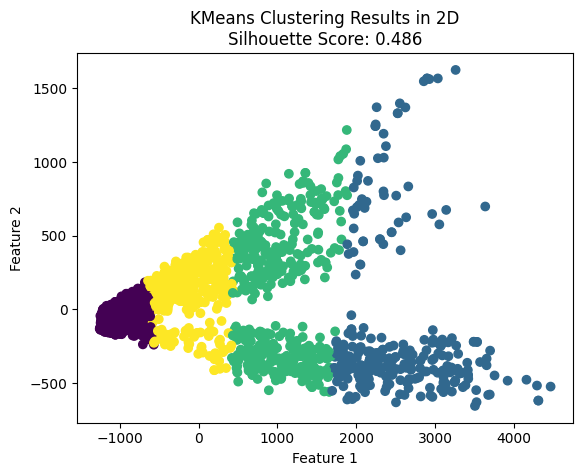

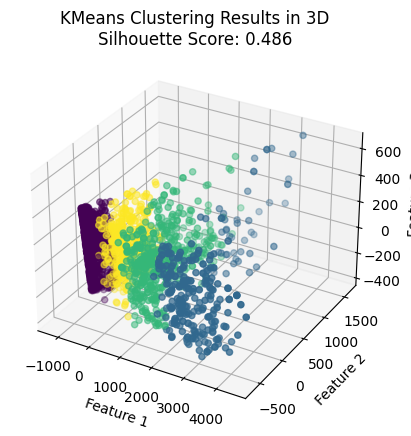

In [133]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Fit the KMeans model with the number of clusters set to 3
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

# Get the predictions
predictions = kmeans.predict(df_pca)

# Calculate the silhouette score
silhouette_score_value = silhouette_score(df_pca, predictions)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(df_pca, predictions)

# Calculate the Davies-Bouldin Index
davies_bouldin_score_value = davies_bouldin_score(df_pca, predictions)

# Visualize the results in 2D
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results in 2D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=predictions, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering Results in 3D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

# Agglomerative Clustering

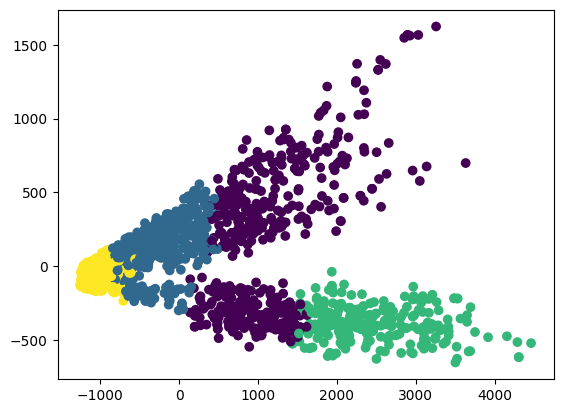

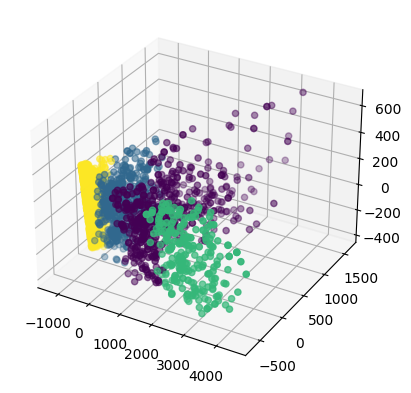

Davies-Bouldin Index: 0.8326420196264712
Silhouette Score: 0.4489686998533327
Calinski-Harabasz Index: 4204.582268896816


In [134]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import davies_bouldin_score

# Generate sample data
X = df_pca

# Compute the pairwise distances between samples
dist_matrix = squareform(pdist(X))

# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_cluster.fit(X)

# Plot the data points colored by their cluster labels in 2D
plt.scatter(X[:, 0], X[:, 1], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Plot the data points colored by their cluster labels in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Calculate the Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X, agg_cluster.labels_)
print("Davies-Bouldin Index:", davies_bouldin_index)
# Calculate the silhouette score
silhouette_score_value = silhouette_score(X, agg_cluster.labels_)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(X, agg_cluster.labels_)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Index:", calinski_harabasz_score_value)

## Summary:


The code starts by loading a tab-separated file into a Pandas dataframe. It then performs various operations to understand the structure and content of the data, including getting the number of rows and columns, checking for missing data, and getting summary statistics. The code then performs data preprocessing, including one-hot encoding of categorical variables and scaling of numerical variables. The data is then reduced to 8 components using PCA, and two clustering algorithms (KMeans and Agglomerative Clustering) are applied to the data. 

Finally, various evaluation metrics are used to assess the quality of the clustering results. The code visualizes the results of the clustering, as well as the relationships between different variables in the data, through various types of plots, including histograms, box plots, scatter plots, violin plots, and pair plots.